# Bike Sharing Assignment

### Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. 

**The company wants to know:**
- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands**

### Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. .


In [1]:
# import libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

## Step 1 - Read, Understand and Visualize data 

### 1.1 Read Data

In [2]:
# read the csv
share = pd.read_csv('day.csv')
share.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### 1.2 Understand Data

In [3]:
share.shape

(730, 16)

In [4]:
share.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [5]:
share.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### cnt is the output variable

### 1.3 Visualize data

Let us first change the datatypes of categorical variables

In [6]:
# convert categorical values as objects
share[['season','yr','mnth','holiday','weekday','workingday','weathersit']] = share[['season','yr','mnth','holiday','weekday','workingday','weathersit']].astype(str) 

In [7]:
#check datatypes
share.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    object 
 4   mnth        730 non-null    object 
 5   holiday     730 non-null    object 
 6   weekday     730 non-null    object 
 7   workingday  730 non-null    object 
 8   weathersit  730 non-null    object 
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(8)
memory usage: 91.4+ KB


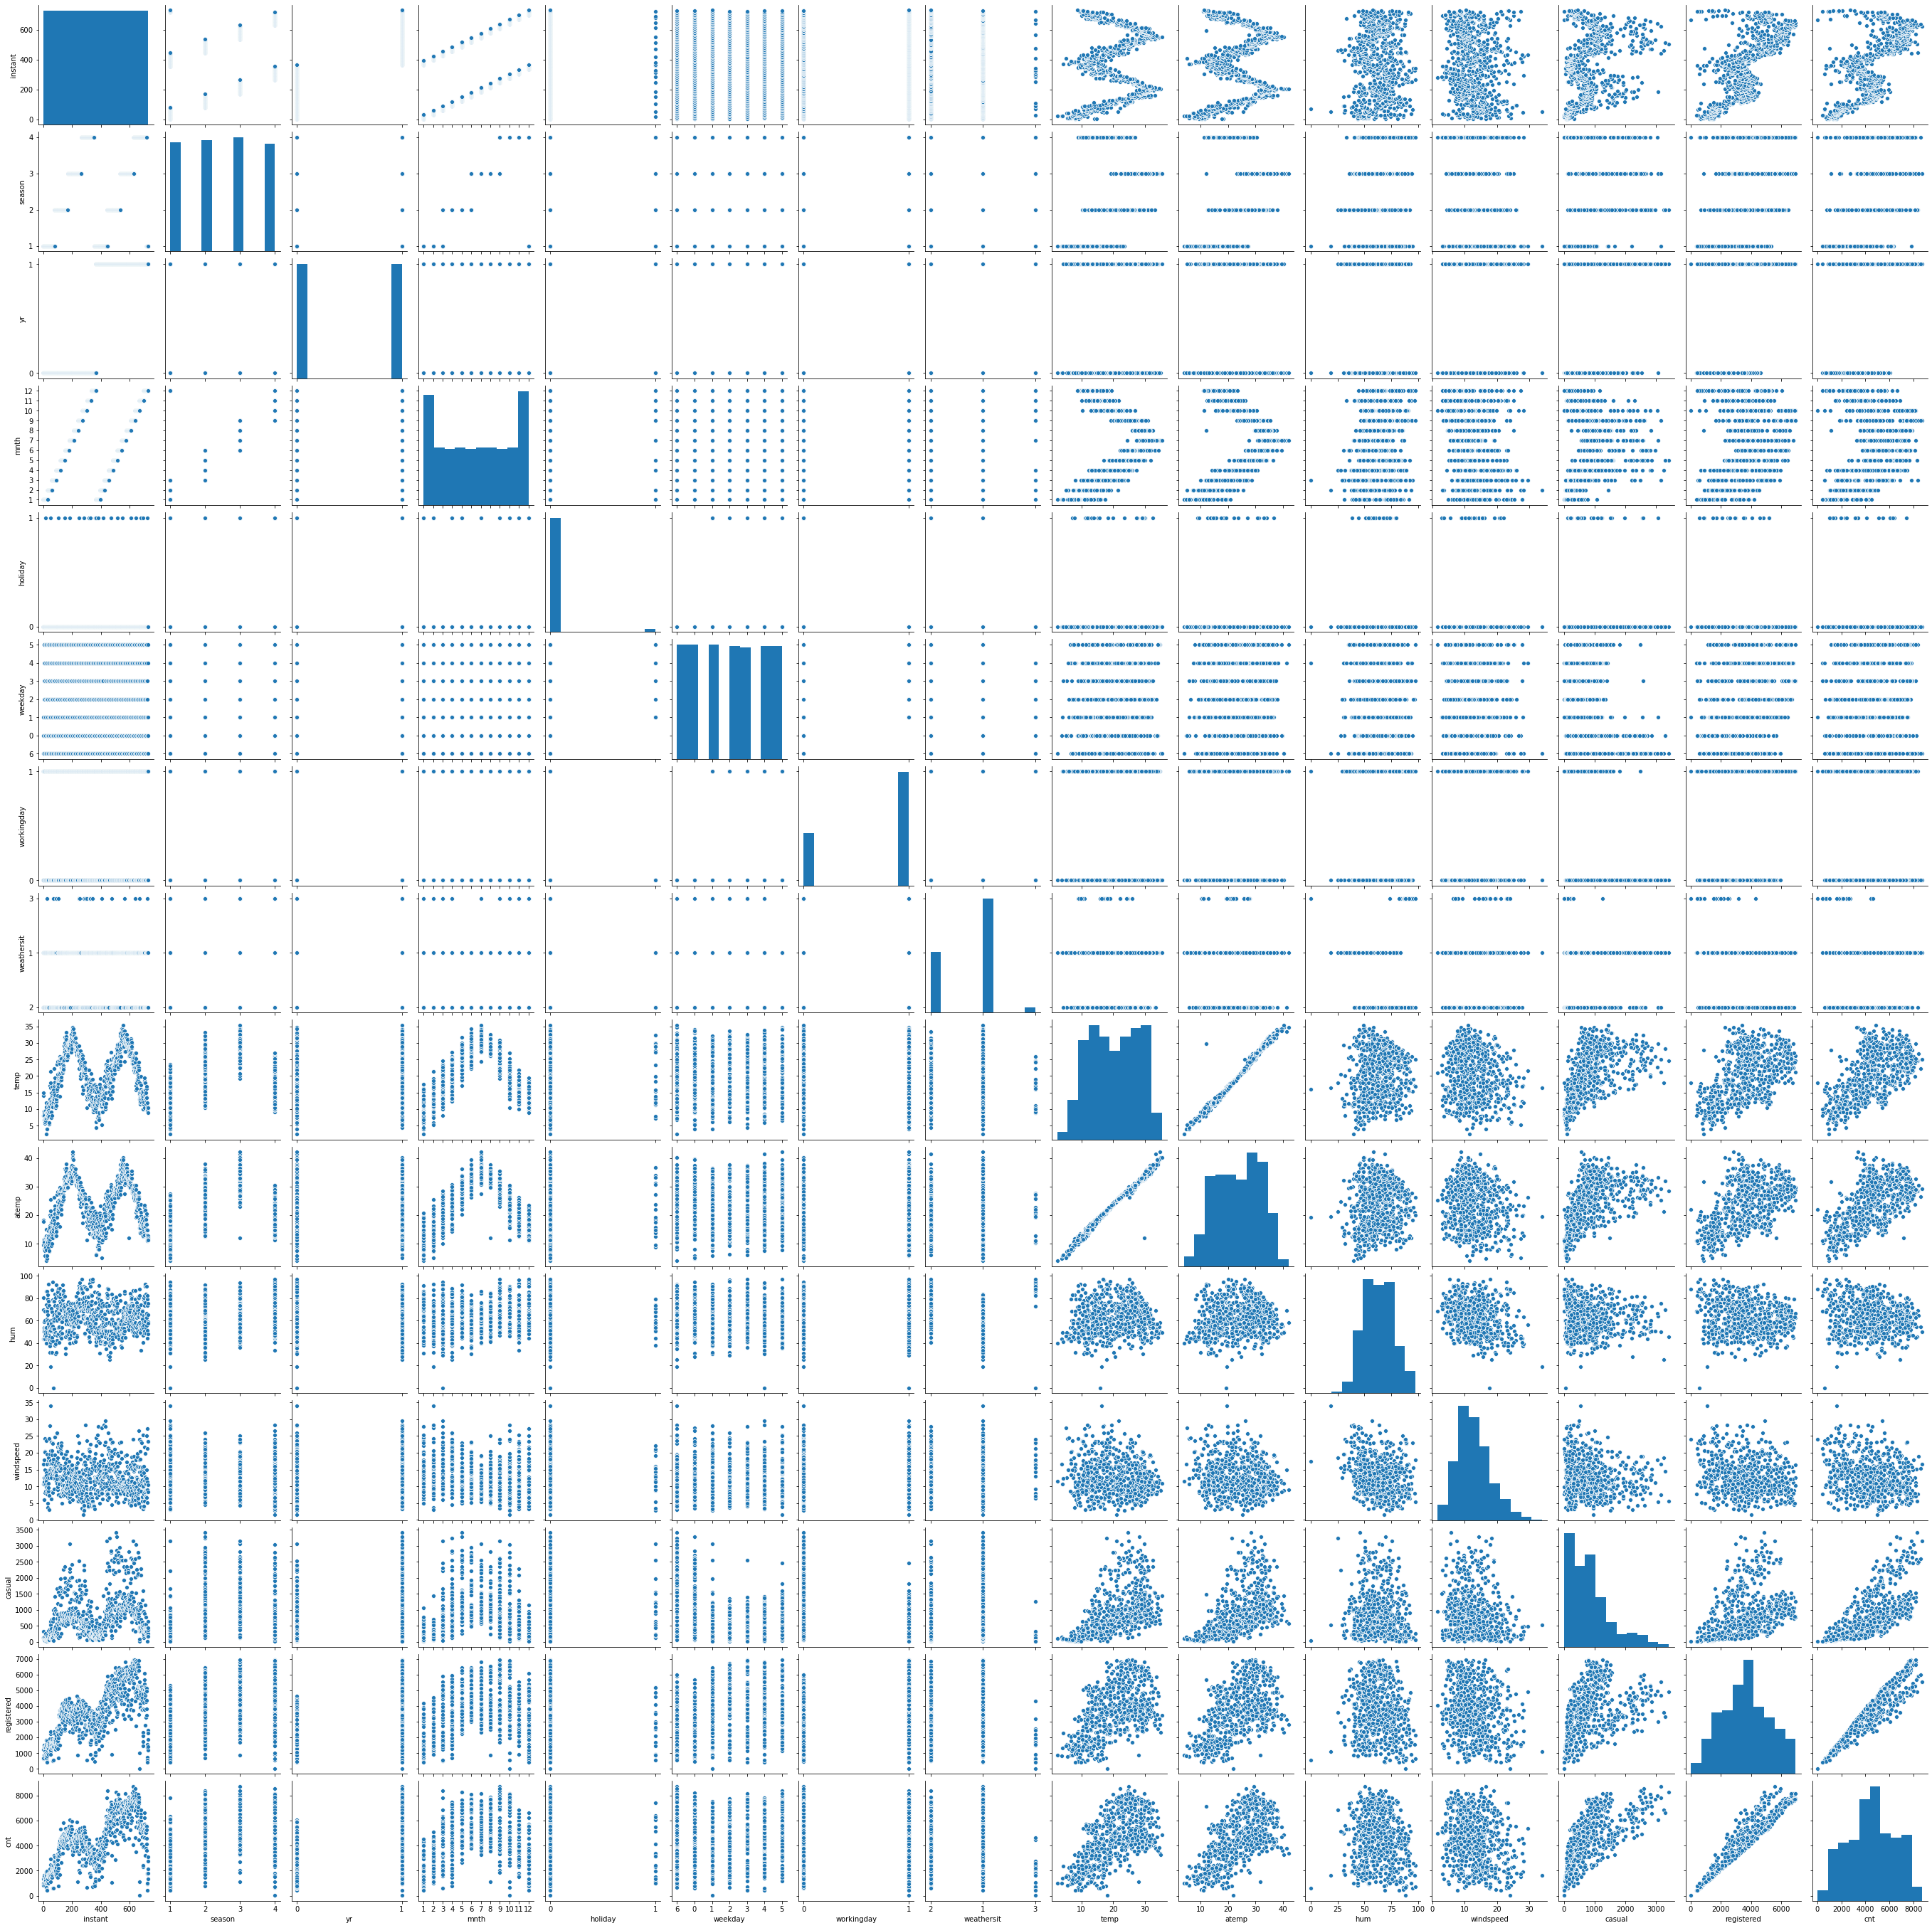

In [8]:
#visualize - check if linear relationship exists between numeric variable
sns.pairplot(share)
plt.show()

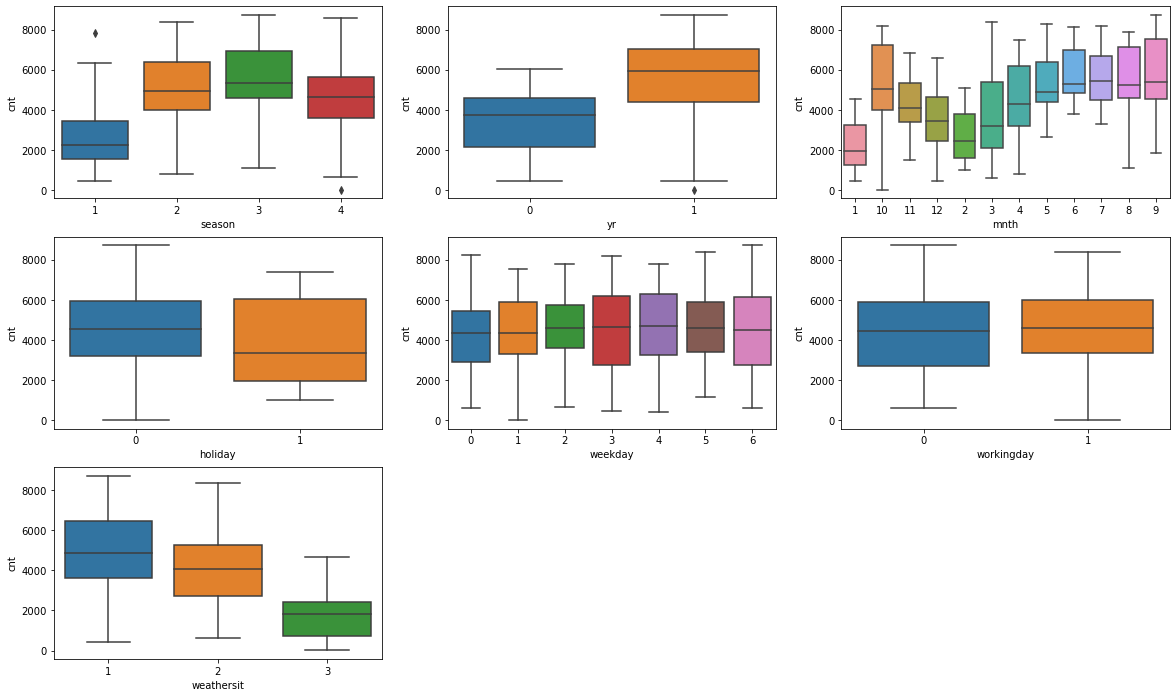

In [9]:
#visualise - categorical variables
plt.figure(figsize=(20,12))
plt.subplot(3,3,1)
sns.boxplot(x='season',y='cnt', data=share)
plt.subplot(3,3,2)
sns.boxplot(x='yr',y='cnt', data=share)
plt.subplot(3,3,3)
sns.boxplot(x='mnth',y='cnt', data=share)
plt.subplot(3,3,4)
sns.boxplot(x='holiday',y='cnt', data=share)
plt.subplot(3,3,5)
sns.boxplot(x='weekday',y='cnt', data=share)
plt.subplot(3,3,6)
sns.boxplot(x='workingday',y='cnt', data=share)
plt.subplot(3,3,7)
sns.boxplot(x='weathersit',y='cnt', data=share)
plt.show()

### Step 2. Prepare the Data

In [10]:
#Column instant looks like just an index - let us drop it
share = share.drop('instant', axis = 1)

In [11]:
#dteday has been split into yr, mnth, and weekday and hence redundant

In [12]:
share = share.drop('dteday', axis = 1)

In [13]:
# 'season' has numbers between 1 and 4, replace with names
sn_map = {'1': 'Spring', '2': 'Summer', '3': 'Fall', '4': 'Winter'}

share['season'] = share['season'].apply(lambda x: sn_map[x])
share

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,Spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,Spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,Spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,Spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,Spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,Spring,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,Spring,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,Spring,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,Spring,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [14]:
# variable 'yr' is binary, hence no changes
# 'mnth' has numbers between 1 and 12, replace with month name
mnth_map = {'1': 'Jan', '2': 'Feb', '3': 'Mar', '4': 'Apr', '5': 'May',
            '6': 'Jun', '7': 'Jul', '8': 'Aug', '9': 'Sep', '10': 'Oct', '11': 'Nov', '12': 'Dec'}

share['mnth'] = share['mnth'].apply(lambda x: mnth_map[x])
share

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,Spring,0,Jan,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,Spring,0,Jan,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,Spring,0,Jan,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,Spring,0,Jan,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,Spring,0,Jan,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,Spring,1,Dec,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,Spring,1,Dec,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,Spring,1,Dec,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,Spring,1,Dec,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [15]:
# 'weekday' has numbers between 0 and 6, replace with day name
wk_map = {'0': 'Sunday', '1': 'Monday', '2': 'Tuesday', '3': 'Wednesday', '4': 'Thursday',
            '5': 'Friday', '6': 'Saturday'}

share['weekday'] = share['weekday'].apply(lambda x: wk_map[x])

In [16]:
# 'weathersit' has numbers between 1 and 4, replace with suitable names
wthr_map = {'1': 'Clear', '2': 'Mist_Cloudy', '3': 'Light_Snow_Rain', '4': 'Heavy_Rain'}

share['weathersit'] = share['weathersit'].apply(lambda x: wthr_map[x])

In [17]:
# 'temp' and 'atemp' almost represent temperature, drop one
share = share.drop('atemp', axis = 1)

In [18]:
# 'casual' and 'registered' sum up to the 'cnt' variable and hence can be dropped
share = share.drop(['casual', 'registered'],axis = 1)

In [19]:
# Let us now look at the data
share.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,Spring,0,Jan,0,Saturday,0,Mist_Cloudy,14.110847,80.5833,10.749882,985
1,Spring,0,Jan,0,Sunday,0,Mist_Cloudy,14.902598,69.6087,16.652113,801
2,Spring,0,Jan,0,Monday,1,Clear,8.050924,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tuesday,1,Clear,8.200000,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wednesday,1,Clear,9.305237,43.6957,12.522300,1600


#### Create Dummy variables for categorical variables

In [20]:
dummy = pd.get_dummies(share[['season','mnth','weekday','weathersit']],drop_first = True)
dummy.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light_Snow_Rain,weathersit_Mist_Cloudy
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [21]:
#concat the dummy DF with actual
bike_shr = pd.concat([share,dummy], axis = 1)
bike_shr.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light_Snow_Rain,weathersit_Mist_Cloudy
0,Spring,0,Jan,0,Saturday,0,Mist_Cloudy,14.110847,80.5833,10.749882,...,0,0,0,1,0,0,0,0,0,1
1,Spring,0,Jan,0,Sunday,0,Mist_Cloudy,14.902598,69.6087,16.652113,...,0,0,0,0,1,0,0,0,0,1
2,Spring,0,Jan,0,Monday,1,Clear,8.050924,43.7273,16.636703,...,0,0,1,0,0,0,0,0,0,0
3,Spring,0,Jan,0,Tuesday,1,Clear,8.200000,59.0435,10.739832,...,0,0,0,0,0,0,1,0,0,0
4,Spring,0,Jan,0,Wednesday,1,Clear,9.305237,43.6957,12.522300,...,0,0,0,0,0,0,0,1,0,0


In [22]:
#Drop the actual columns that are not needed
bike_shr = bike_shr.drop(['season','mnth','weekday','weathersit'],axis = 1)
bike_shr.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light_Snow_Rain,weathersit_Mist_Cloudy
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


## Prepare the Train-test data set

In [23]:
df_train, df_test = train_test_split(bike_shr, train_size = 0.7, random_state = 100)
print (df_train.shape)
print (df_test.shape)

(510, 29)
(220, 29)


## Feature Scaling

In [24]:
#Using minmaxscaling to scale numeric variables

# 1. Initiate the object
scl = MinMaxScaler()

#2. Create the list of variables to be scaled
lst = ['temp','hum','windspeed','cnt']

#fit and transform
df_train[lst] = scl.fit_transform(df_train[lst])
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light_Snow_Rain,weathersit_Mist_Cloudy
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,1,0,0,0,0,0,1
111,0,0,1,0.345824,0.751824,0.380981,0.191095,0,1,0,...,0,0,0,0,0,0,0,0,0,1


## Step 3. Train the Model

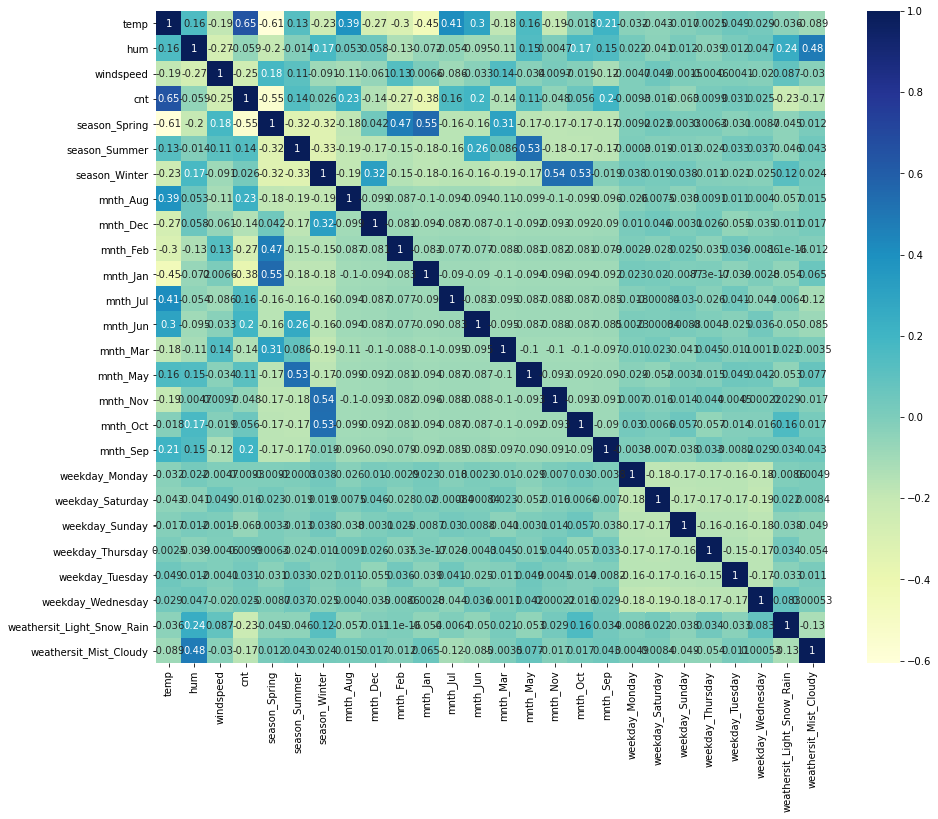

In [25]:
# Let us first look at the correlation between variables using heatmap
plt.figure(figsize = (15,12))
sns.heatmap(df_train.corr(),annot = True, cmap = 'YlGnBu')
plt.show()

In [26]:
# Create y-train ans X_train

y_train = df_train.pop('cnt')
X_train = df_train
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,season_Spring,season_Summer,season_Winter,mnth_Aug,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light_Snow_Rain,weathersit_Mist_Cloudy
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
111,0,0,1,0.345824,0.751824,0.380981,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [27]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 576 to 520
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   yr                          510 non-null    object 
 1   holiday                     510 non-null    object 
 2   workingday                  510 non-null    object 
 3   temp                        510 non-null    float64
 4   hum                         510 non-null    float64
 5   windspeed                   510 non-null    float64
 6   season_Spring               510 non-null    uint8  
 7   season_Summer               510 non-null    uint8  
 8   season_Winter               510 non-null    uint8  
 9   mnth_Aug                    510 non-null    uint8  
 10  mnth_Dec                    510 non-null    uint8  
 11  mnth_Feb                    510 non-null    uint8  
 12  mnth_Jan                    510 non-null    uint8  
 13  mnth_Jul                    510 n

In [28]:
#Using RFE to build our model
lm = LinearRegression()
lm.fit(X_train, y_train)

#run RFE by choosing top 25 variables
rfe = RFE(lm,25)
rfe = rfe.fit(X_train, y_train)

In [29]:
#check the rankings
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('mnth_Aug', True, 1),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', True, 1),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 3),
 ('mnth_Mar', False, 4),
 ('mnth_May', True, 1),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 2),
 ('mnth_Sep', True, 1),
 ('weekday_Monday', True, 1),
 ('weekday_Saturday', True, 1),
 ('weekday_Sunday', True, 1),
 ('weekday_Thursday', True, 1),
 ('weekday_Tuesday', True, 1),
 ('weekday_Wednesday', True, 1),
 ('weathersit_Light_Snow_Rain', True, 1),
 ('weathersit_Mist_Cloudy', True, 1)]

In [30]:
column = X_train.columns[rfe.support_]
column

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_Spring', 'season_Summer', 'season_Winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_May', 'mnth_Nov',
       'mnth_Sep', 'weekday_Monday', 'weekday_Saturday', 'weekday_Sunday',
       'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wednesday',
       'weathersit_Light_Snow_Rain', 'weathersit_Mist_Cloudy'],
      dtype='object')

In [31]:
X_train.columns[~rfe.support_]

Index(['mnth_Jun', 'mnth_Mar', 'mnth_Oct'], dtype='object')

### Let us look at detailed statistics using statsmodel

In [32]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[column]

In [33]:
# Adding a constant variable
X_train_rfe = sm.add_constant(X_train_rfe)

#Run the Linear Model
lm = sm.OLS(y_train.astype(float),X_train_rfe.astype(float)).fit()

In [34]:
# print the summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     116.8
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          2.53e-184
Time:                        19:04:30   Log-Likelihood:                 526.99
No. Observations:                 510   AIC:                            -1004.
Df Residuals:                     485   BIC:                            -898.1
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [35]:
#VIF
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values.astype(float),i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
2,workingday,85.54
21,weekday_Saturday,19.71
22,weekday_Sunday,18.34
6,season_Spring,10.75
8,season_Winter,9.44
7,season_Summer,8.27
3,temp,7.08
17,mnth_Nov,6.79
18,mnth_Oct,6.47
9,mnth_Aug,6.36


In [36]:
# drop the variable weekday_Wednesday
X_train_new = X_train_rfe.drop(['weekday_Wednesday'],axis = 1)

#Rebuilding model without weekday_Wednesday
X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train.astype(float), X_train_lm.astype(float)).fit()

#summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     122.1
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          2.42e-185
Time:                        19:04:30   Log-Likelihood:                 526.92
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     486   BIC:                            -904.2
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.2447      0.032      7.601      0.000       0.181       0.308
yr                             0.2322      0.008     29.055      0.000       0.217       0.248
holiday                        0.0092      0.023      0.398      0.691      -0.036       0.055
workingday                     0.0949      0.011      8.858      0.000       0.074       0.116
temp                           0.4483      0.038     11.674      0.000       0.373       0.524
hum                           -0.1518      0.038     -4.025      0.000      -0.226      -0.078
windspeed                     -0.1862      0.025     -7.319      0.000      -0.236      -0.136
season_Spring                 -0.0467      0.027     -1.755      0.080      -0.099       0.006
season_Summer                  0.0399      0.023      1.716      0.087      -0.006       0.086
season_Winter                  0.1095      0.023      4.830      0.000       0.065       0.154
mnth_Aug                       0.0151      0.024      0.638      0.524      -0.031       0.061
mnth_Dec                      -0.0489      0.018     -2.689      0.007      -0.085      -0.013
mnth_Feb                      -0.0344      0.021     -1.603      0.110      -0.076       0.008
mnth_Jan                      -0.0651      0.021     -3.067      0.002      -0.107      -0.023
mnth_Jul                      -0.0392      0.025     -1.591      0.112      -0.088       0.009
mnth_May                       0.0227      0.017      1.311      0.191      -0.011       0.057
mnth_Nov                      -0.0462      0.019     -2.443      0.015      -0.083      -0.009
mnth_Sep                       0.0803      0.021      3.746      0.000       0.038       0.122
weekday_Monday                -0.0179      0.013     -1.389      0.165      -0.043       0.007
weekday_Saturday               0.0974      0.013      7.663      0.000       0.072       0.122
weekday_Sunday                 0.0432      0.013      3.313      0.001       0.018       0.069
weekday_Thursday              -0.0061      0.013     -0.467      0.640      -0.032       0.020
weekday_Tuesday               -0.0150      0.013     -1.145      0.253      -0.041       0.011
weathersit_Light_Snow_Rain    -0.2563      0.026     -9.782      0.000      -0.308      -0.205
weathersit_Mist_Cloudy        -0.0593      0.010     -5.730      0.000      -0.080      -0.039
==============================================================================
Omnibus:                       82.216   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              225.232
Skew:                          -0.788   Prob(JB):                     1.23e-49
Kurtosis:                       5.849   Cond. No.                     6.89e+15
============================

In [37]:
#VIF
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values.astype(float),i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
2,holiday,inf
3,workingday,inf
20,weekday_Sunday,inf
19,weekday_Saturday,inf
7,season_Spring,8.55
8,season_Summer,6.60
9,season_Winter,6.27
4,temp,4.92
10,mnth_Aug,3.17
14,mnth_Jul,2.81


In [38]:
# drop the variable holiday
X_train_n2 = X_train_new.drop(['holiday'],axis = 1)

#Rebuilding model without 'holiday'
X_train_lm = sm.add_constant(X_train_n2)

lm = sm.OLS(y_train.astype(float), X_train_lm.astype(float)).fit()

#summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     122.1
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          2.42e-185
Time:                        19:04:30   Log-Likelihood:                 526.92
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     486   BIC:                            -904.2
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [39]:
#VIF
vif = pd.DataFrame()
vif['Features'] = X_train_n2.columns
vif['VIF'] = [variance_inflation_factor(X_train_n2.values.astype(float),i) for i in range(X_train_n2.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
0,const,153.33
2,workingday,9.97
6,season_Spring,8.55
18,weekday_Saturday,7.20
19,weekday_Sunday,6.79
7,season_Summer,6.60
8,season_Winter,6.27
3,temp,4.92
9,mnth_Aug,3.17
13,mnth_Jul,2.81


In [40]:
# drop the variable 'weekday_Thursday'
X_train_n3 = X_train_n2.drop(['weekday_Thursday'],axis = 1)

#Rebuilding model without 'weekday_Thursday'
X_train_lm = sm.add_constant(X_train_n3)

lm = sm.OLS(y_train.astype(float), X_train_lm.astype(float)).fit()

#summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     127.9
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          2.36e-186
Time:                        19:04:30   Log-Likelihood:                 526.81
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     487   BIC:                            -910.2
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [41]:
#VIF
vif = pd.DataFrame()
vif['Features'] = X_train_n3.columns
vif['VIF'] = [variance_inflation_factor(X_train_n3.values.astype(float),i) for i in range(X_train_n3.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
0,const,151.15
2,workingday,9.96
6,season_Spring,8.55
18,weekday_Saturday,6.98
7,season_Summer,6.60
19,weekday_Sunday,6.59
8,season_Winter,6.27
3,temp,4.92
9,mnth_Aug,3.17
13,mnth_Jul,2.81


In [42]:
# drop the variable 'mnth_Aug'
X_train_n4 = X_train_n3.drop(['mnth_Aug'],axis = 1)

#Rebuilding model without 'mnth_Aug'
X_train_lm = sm.add_constant(X_train_n4)

lm = sm.OLS(y_train.astype(float), X_train_lm.astype(float)).fit()

#summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     134.1
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          2.47e-187
Time:                        19:04:30   Log-Likelihood:                 526.59
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     488   BIC:                            -916.0
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [43]:
#VIF
vif = pd.DataFrame()
vif['Features'] = X_train_n4.columns
vif['VIF'] = [variance_inflation_factor(X_train_n4.values.astype(float),i) for i in range(X_train_n4.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
0,const,140.51
2,workingday,9.96
17,weekday_Saturday,6.97
18,weekday_Sunday,6.59
6,season_Spring,5.79
3,temp,4.90
8,season_Winter,3.88
7,season_Summer,3.49
11,mnth_Jan,2.38
4,hum,1.97


In [44]:
# drop the variable 'weekday_Sunday'
X_train_n5 = X_train_n4.drop(['weekday_Sunday'],axis = 1)

#Rebuilding model without 'weekday_Sunday'
X_train_lm = sm.add_constant(X_train_n5)

lm = sm.OLS(y_train.astype(float), X_train_lm.astype(float)).fit()

#summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     140.5
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          4.60e-188
Time:                        19:04:30   Log-Likelihood:                 525.74
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     489   BIC:                            -920.6
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [45]:
#VIF
vif = pd.DataFrame()
vif['Features'] = X_train_n5.columns
vif['VIF'] = [variance_inflation_factor(X_train_n5.values.astype(float),i) for i in range(X_train_n5.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
0,const,96.73
6,season_Spring,5.79
3,temp,4.88
8,season_Winter,3.88
7,season_Summer,3.49
11,mnth_Jan,2.37
4,hum,1.97
10,mnth_Feb,1.87
14,mnth_Nov,1.79
2,workingday,1.78


In [46]:
# drop the variable 'weekday_Tuesday'
X_train_n6 = X_train_n5.drop(['weekday_Tuesday'],axis = 1)

#Rebuilding model without 'weekday_Tuesday'
X_train_lm = sm.add_constant(X_train_n6)

lm = sm.OLS(y_train.astype(float), X_train_lm.astype(float)).fit()

#summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     147.8
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          7.16e-189
Time:                        19:04:30   Log-Likelihood:                 525.06
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     490   BIC:                            -925.4
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [47]:
#VIF
vif = pd.DataFrame()
vif['Features'] = X_train_n6.columns
vif['VIF'] = [variance_inflation_factor(X_train_n6.values.astype(float),i) for i in range(X_train_n6.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
0,const,96.69
6,season_Spring,5.79
3,temp,4.88
8,season_Winter,3.88
7,season_Summer,3.49
11,mnth_Jan,2.37
4,hum,1.97
10,mnth_Feb,1.86
14,mnth_Nov,1.79
2,workingday,1.67


In [48]:
# drop the variable 'mnth_May'
X_train_n7 = X_train_n6.drop(['mnth_May'],axis = 1)

#Rebuilding model without 'mnth_May'
X_train_lm = sm.add_constant(X_train_n7)

lm = sm.OLS(y_train.astype(float), X_train_lm.astype(float)).fit()

#summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     155.7
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          1.30e-189
Time:                        19:04:30   Log-Likelihood:                 524.18
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     491   BIC:                            -929.9
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [49]:
#VIF
vif = pd.DataFrame()
vif['Features'] = X_train_n7.columns
vif['VIF'] = [variance_inflation_factor(X_train_n7.values.astype(float),i) for i in range(X_train_n7.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
0,const,92.75
6,season_Spring,5.69
3,temp,4.73
8,season_Winter,3.85
7,season_Summer,2.82
11,mnth_Jan,2.36
4,hum,1.94
10,mnth_Feb,1.86
13,mnth_Nov,1.79
2,workingday,1.67


In [50]:
# drop the variable 'season_Spring'
X_train_n8 = X_train_n7.drop(['season_Spring'],axis = 1)

#Rebuilding model without 'season_Spring'
X_train_lm = sm.add_constant(X_train_n8)

lm = sm.OLS(y_train.astype(float), X_train_lm.astype(float)).fit()

#summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     162.8
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          2.05e-189
Time:                        19:04:30   Log-Likelihood:                 521.03
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     492   BIC:                            -929.8
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [51]:
#VIF
vif = pd.DataFrame()
vif['Features'] = X_train_n8.columns
vif['VIF'] = [variance_inflation_factor(X_train_n8.values.astype(float),i) for i in range(X_train_n8.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
0,const,68.85
3,temp,3.18
7,season_Winter,2.32
10,mnth_Jan,2.26
4,hum,1.92
12,mnth_Nov,1.76
9,mnth_Feb,1.72
6,season_Summer,1.71
2,workingday,1.67
15,weekday_Saturday,1.67


In [52]:
# drop the variable 'weekday_Monday'
X_train_n9 = X_train_n8.drop(['weekday_Monday'],axis = 1)

#Rebuilding model without 'weekday_Monday'
X_train_lm = sm.add_constant(X_train_n9)

lm = sm.OLS(y_train.astype(float), X_train_lm.astype(float)).fit()

#summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     172.2
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          5.59e-190
Time:                        19:04:30   Log-Likelihood:                 519.69
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     493   BIC:                            -933.4
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [53]:
#VIF
vif = pd.DataFrame()
vif['Features'] = X_train_n9.columns
vif['VIF'] = [variance_inflation_factor(X_train_n9.values.astype(float),i) for i in range(X_train_n9.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
0,const,68.83
3,temp,3.18
7,season_Winter,2.31
10,mnth_Jan,2.26
4,hum,1.92
12,mnth_Nov,1.76
9,mnth_Feb,1.72
6,season_Summer,1.71
2,workingday,1.66
14,weekday_Saturday,1.65


In [54]:
#drop contsant term
X_train_final = X_train_n9.drop(['const'], axis=1)

**Values of P for all variables are < 0.05**
**All values of VIF are < 5**

## The number of variables are 15 excluding the constant which has given the desired R-squared, p value and VIF

## Step 4. Residual Analysis

Text(0.5, 0, 'Errors')

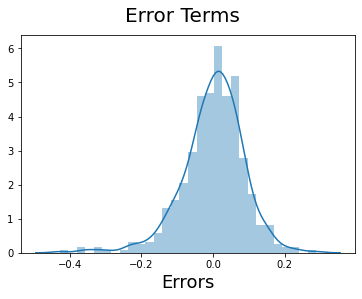

In [55]:
# Let us look at the residual analysis to see if the distribution is normal
y_train_pred = lm.predict(X_train_lm.astype(float))

fig = plt.figure()
residual = y_train - y_train_pred
sns.distplot(residual)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

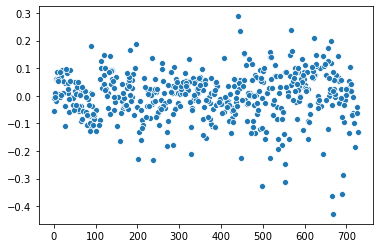

In [56]:
# Lets us check if the error terms are independant
sns.scatterplot(data = residual)

**Residual Analysis also shows that:**
- Error terms are normalized (mean is zero)
- Error terms are independant

## STEP 5: Predictions and Evaluations on Test Set

In [57]:
#create a list of numeric variables
num_vars = ['temp','hum','windspeed', 'cnt']

#2. Transform Test data set

df_test[num_vars] = scl.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light_Snow_Rain,weathersit_Mist_Cloudy
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.610133,0.153728,0.712034,0,1,0,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.837699,0.334206,0.303382,0,0,1,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.437098,0.339570,0.547400,0,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.314298,0.537414,0.569029,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [58]:
df_test.describe()

,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light_Snow_Rain,weathersit_Mist_Cloudy
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.558718,0.638221,0.313293,0.522154,0.254545,0.263636,0.236364,0.059091,0.086364,0.100000,...,0.086364,0.086364,0.127273,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182
std,0.233187,0.148694,0.159584,0.219163,0.436599,0.441609,0.425817,0.236333,0.281541,0.300684,...,0.281541,0.281541,0.334038,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833
min,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.355429,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.558172,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.755981,0.743798,0.402718,0.677750,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [59]:
y_test = df_test.pop('cnt')
X_test = df_test

In [60]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_final.columns]
X_test_new = X_test_new.astype(float)

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [61]:
# Making predictions
y_pred = lm.predict(X_test_new)

### Model Evaluation

Text(0, 0.5, 'y_pred')

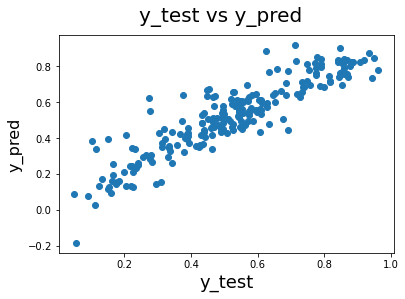

In [62]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [63]:
#evaluate
r2_score(y_true = y_test,y_pred = y_pred)

0.8186130791533834

**Overall we have a good model with almost 81% of variance in the output being explained by the model.**

### The following 3 variables are significant in the demand of shared bikes
- Temperature: 
- Season: Winter
- Month: January